## Project Name: Predicting Hospital Readmission

The purpose of this project is to predict the possibility of hospital readmission of a diabetic patient. A hospital readmission is when a patient is discharged from the hospital and get readmitted in certain period of a time for a similar diagnosis. Hospital readmission for certain digit is considered to be the measure of the quality of hospitals. So to regulate this, prediction of hospital readmission will help to take appropriate measures in medication. The hospital readmission is predicted based on other factors in a dataset.

### Dataset:

For this project, the dataset is taken from UCI Machine Learning Repository. The dataset is publicly available to download from: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#

The dataset consist of 50 features and 101766 records.

The target variable has 3 classes and this is the multi-class classification problem.

The data set is easy to understand.However, the meaning of some of the column headers are not obvious. Here's what they mean:

###### Encounter ID : Unique identifier of an encounter	
###### Patient number : Unique identifier of a patient	
###### Race : Caucasian, Asian, African American, Hispanic, and other	
###### Gender: male, female	
###### Age : Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	
###### Weight : Weight in pounds.	
###### Admission type :identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available	
###### Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available	
###### Admission source : Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
###### Time in hospital : number of days between admission and discharge	
###### Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay	
###### Medical specialty : Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	
###### Number of lab procedures : Number of lab tests performed during the encounter
###### Number of procedures : Number of procedures (other than lab tests) performed during the encounter
###### Number of medications :	Number of distinct generic names administered during the encounter
###### Number of outpatient visits : Number of outpatient visits of the patient in the year preceding the encounter	
###### Number of emergency visits : Number of emergency visits of the patient in the year preceding the encounter	
###### Number of inpatient visits : Number of inpatient visits of the patient in the year preceding the encounter	
###### Diagnosis 1	: The primary diagnosis (coded as first three digits of ICD9)
###### Diagnosis 2	: Secondary diagnosis (coded as first three digits of ICD9)
###### Diagnosis 3	: Additional secondary diagnosis (coded as first three digits of ICD9)
###### Number of diagnoses : Number of diagnoses entered to the system	
###### Glucose serum test result :Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	
###### A1c test result	: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	
###### Change of medications :	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”	0%
###### Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	0%
###### 24 features for medications	Nominal	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone :           
###### - the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	
###### Readmitted :Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission. (Target Variable)








In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from statistics import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Importing data

dataframe= pd.read_csv(r"D:\ALY 6020 Predictive Analytics\Final_Project\diabetic_data.csv")
dataframe.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#Identifying Shape

dataframe.shape

(101766, 50)

In [4]:
#Identifying Column

dataframe.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
#information of data set

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
#Statistical description of data
dataframe.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
#Identifying Null Values
dataframe.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Text(0.5,1,'Null Values')

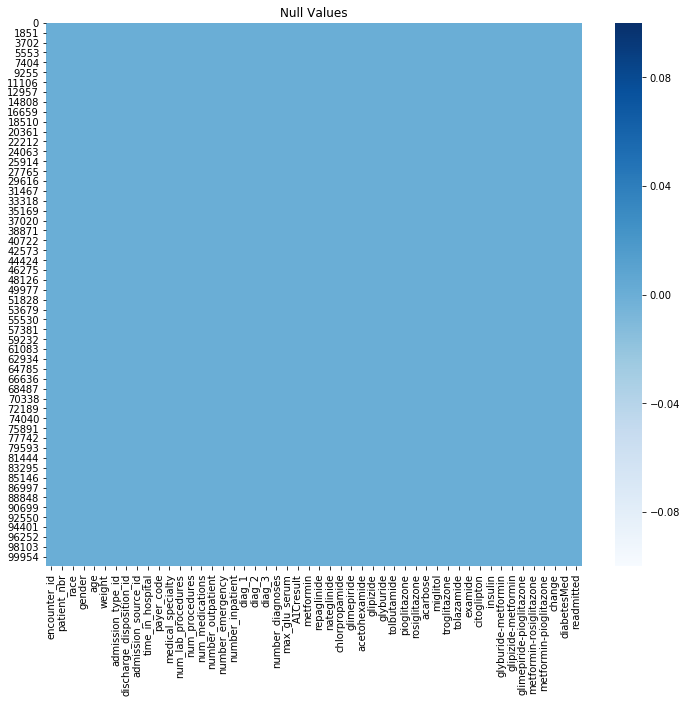

In [8]:
#Graphical visualization of missing values

plt.figure(figsize=(12,10))
ax = plt.axes()

sb.heatmap(dataframe.isnull(),cmap = "Blues")

ax.set_title("Null Values")

In [9]:
#Identifying corrupted values
for col in dataframe.columns:
    if dataframe[col].dtype == object:
         print(col,dataframe[col][dataframe[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### Data Cleaning

The above code showcase there are corrupted values.We need to handle this corrupted values before proceeding for predictions.


In [10]:
#creating a dataframe copy before pre-processing
df = dataframe.copy()
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
#Since More than 50% of data is corrupted in columns weight, prayer_code, and medical_specialty,
#we are dropping those columns
# dropping columns with too many missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [12]:
#There are 4 columns race, diag 1, diag 2 , diag 3 which have corrupted values less than 5%, 
#so we are not dropping columns.
#We are removing rows of the corrupted values of these columns

df = df[df.race != '?']
df = df[df.diag_1 != '?']
df = df[df.diag_2 != '?']
df = df[df.diag_3 != '?']

In [13]:
# remove columns having same value in each row: citoglipton, examide
#These columns have same values for each row, So these cannot provide any information for predicting readmission
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [14]:
#identifying missing gender
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 1


In [15]:
#Removing rows where gender is unknown
df = df[df.gender != 'Unknown/Invalid']


In [16]:
#After Clean up
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 0


In [17]:
#identifying patients who are dead. 
print('discharge_disposition_id', df['discharge_disposition_id'][df['discharge_disposition_id'] == 11].count())

discharge_disposition_id 1606


In [18]:
#Removing dead patient as the probability of readmission is zero
df = df[df.discharge_disposition_id != 11]


In [19]:
#Checking Corrupted Values, once data is cleaned.
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [20]:
#Finding Duplicate values

df.duplicated().sum()

0

Data is now clean and have no corrupted values.

In [21]:
#Shape of a new and reformed dataset
df.shape

(96446, 45)

### Data Preprocessing


There are some features which have same meaning but encoded differently. We are encoding these features into fewer categories

In [22]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,11)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(20,11)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(21,11)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(12,11)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

After re-encoding, below are categories for each feature

Admission Type ID has below categories:

1. Emergency
2. Elective
3. Newborn
4. Not Available 

Discharge Disposition ID has below categories:

1. Discharged to home
2. Transfered to another short term hospital
3. Left AMA
4. Transfered to another hospital for aftercare.
5. Expired
6. Not Available
7. Transfered to federal health care facility
8. Transfered to psychatric hospital
9. Transfered to critical access hospital

Admission Source ID has below categories:

1. Referal
2. Transfer from a hospital
3. Emergency Room
4. Court/Law Enforcement
5. Not available
6. Baby
7. Transfer From Another Home Health Agency
8. Readmission to Same Home Health Agency
9. Born inside this hospital
10. Born outside this hospital
11. Transfer from Hospice


In [23]:
##creating patient visit as a new feature:
## It holds value of total number of visit of a patient in different cases

df['patient_visit'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

As we know that Machine Learning model can only handle numerical features, so LabelEncoder, an in-built algorithm is used to convert categorical features into numerical features.

In [24]:
# Converting Categorical feature into numerical feature by using LabelEncoder

data_hospital = df.copy()


from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()

data_hospital['race'] = lb_encode .fit_transform(data_hospital['race'])
print(lb_encode.classes_)
data_hospital['gender'] = lb_encode .fit_transform(data_hospital['gender'])
print(lb_encode.classes_)
data_hospital['age'] = lb_encode .fit_transform(data_hospital['age'])
print(lb_encode.classes_)
data_hospital['max_glu_serum'] = lb_encode .fit_transform(data_hospital['max_glu_serum'])
print(lb_encode.classes_)
data_hospital['A1Cresult'] = lb_encode.fit_transform(data_hospital['A1Cresult'])
print(lb_encode.classes_)
data_hospital['change'] = lb_encode .fit_transform(data_hospital['change'])
print(lb_encode.classes_)
data_hospital['diabetesMed'] = lb_encode.fit_transform(data_hospital['diabetesMed'])
print(lb_encode.classes_)



['AfricanAmerican' 'Asian' 'Caucasian' 'Hispanic' 'Other']
['Female' 'Male']
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
['>200' '>300' 'None' 'Norm']
['>7' '>8' 'None' 'Norm']
['Ch' 'No']
['No' 'Yes']


In [25]:
data_hospital.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,patient_visit
1,149190,55629189,2,0,1,1,1,7,3,59,...,Up,No,No,No,No,No,0,1,>30,0
2,64410,86047875,0,0,2,1,1,7,2,11,...,No,No,No,No,No,No,1,1,NO,3
3,500364,82442376,2,1,3,1,1,7,2,44,...,Up,No,No,No,No,No,0,1,NO,0
4,16680,42519267,2,1,4,1,1,7,1,51,...,Steady,No,No,No,No,No,0,1,NO,0
5,35754,82637451,2,1,5,1,1,1,3,31,...,Steady,No,No,No,No,No,1,1,>30,0


In [27]:
# To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:
# Target Variable: Readmitted
# 0: No readmission
# 0: Readmission after 30 days
# 1: Readmission in less than 30 days

data_hospital['readmitted'] = data_hospital['readmitted'].replace('NO', 0)
data_hospital['readmitted'] = data_hospital['readmitted'].replace('>30', 0)
data_hospital['readmitted'] = data_hospital['readmitted'].replace('<30', 1)

In [28]:
#features for different medications. 
# This displays changes in medication for patients.
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [29]:
#Converting Categorical medicational features to numerical using replace method
#0: No medication given
#1: Steady medication given
#2: Medication is reduced
#3: Medication is increased

for col in keys:
    data_hospital[col] = data_hospital[col].replace('No', 0)
    data_hospital[col] = data_hospital[col].replace('Steady', 1)
    data_hospital[col] = data_hospital[col].replace('Down', 2) 
    data_hospital[col] = data_hospital[col].replace('Up', 3)

Converting diagnosis numerical features into categorical:

In this dataset, there are 3 diagnosis:

Diagnosis 1	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
Diagnosis 2	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
Diagnosis 3	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

We have collapsed these diagnosis codes into 9 disease categories as done in the dataset description. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. 

Reference: https://www.hindawi.com/journals/bmri/2014/781670/tab2/ 


In [30]:
# Creating additional columns for diagnosis
data_hospital['level1_diag1'] = data_hospital['diag_1']
data_hospital['level2_diag1'] = data_hospital['diag_1']
data_hospital['level1_diag2'] = data_hospital['diag_2']
data_hospital['level2_diag2'] = data_hospital['diag_2']
data_hospital['level1_diag3'] = data_hospital['diag_3']
data_hospital['level2_diag3'] = data_hospital['diag_3']

In [31]:
data_hospital.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
data_hospital.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
data_hospital.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
data_hospital.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
data_hospital.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
data_hospital.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0

In [32]:
data_hospital['level1_diag1'] = data_hospital['level1_diag1'].astype(float)
data_hospital['level2_diag1'] = data_hospital['level2_diag1'].astype(float)
data_hospital['level1_diag2'] = data_hospital['level1_diag2'].astype(float)
data_hospital['level2_diag2'] = data_hospital['level2_diag2'].astype(float)
data_hospital['level1_diag3'] = data_hospital['level1_diag3'].astype(float)
data_hospital['level2_diag3'] = data_hospital['level2_diag3'].astype(float)

In [33]:
for index, row in data_hospital.iterrows():
    #Classification for diagnosis 1 as given in dataset description
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        data_hospital.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        data_hospital.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        data_hospital.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        data_hospital.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        data_hospital.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        data_hospital.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        data_hospital.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        data_hospital.loc[index, 'level1_diag1'] = 8
    else:
        data_hospital.loc[index, 'level1_diag1'] = 0
    
    #Classification for diagnosis 2 as given in dataset description
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        data_hospital.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        data_hospital.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        data_hospital.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        data_hospital.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        data_hospital.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        data_hospital.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
         data_hospital.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        data_hospital.loc[index, 'level1_diag2'] = 8
    else:
        data_hospital.loc[index, 'level1_diag2'] = 0
    
    #Classification for diagnosis 3 as given in dataset description
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        data_hospital.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        data_hospital.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        data_hospital.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        data_hospital.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        data_hospital.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        data_hospital.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        data_hospital.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        data_hospital.loc[index, 'level1_diag3'] = 8
    else:
        data_hospital.loc[index, 'level1_diag3'] = 0

In [34]:
#Converting it into int category

data_hospital['level1_diag1'] = data_hospital['level1_diag1'].astype(int)
data_hospital['level1_diag2'] = data_hospital['level1_diag2'].astype(int)
data_hospital['level1_diag3'] = data_hospital['level1_diag3'].astype(int)

In [35]:
data_hospital.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,change,diabetesMed,readmitted,patient_visit,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,149190,55629189,2,0,1,1,1,7,3,59,...,0,1,0,0,0,276.0,4,250.01,0,255.0
2,64410,86047875,0,0,2,1,1,7,2,11,...,1,1,0,3,0,648.0,4,250.00,0,0.0
3,500364,82442376,2,1,3,1,1,7,2,44,...,0,1,0,0,0,8.0,4,250.43,1,403.0
4,16680,42519267,2,1,4,1,1,7,1,51,...,0,1,0,0,8,197.0,8,157.00,4,250.0
5,35754,82637451,2,1,5,1,1,1,3,31,...,1,1,0,0,1,414.0,1,411.00,4,250.0


In [36]:
data_hospital.shape

(96446, 52)

In [37]:
data_hospital.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_visit', 'level1_diag1', 'level2_diag1', 'level1_diag2',
       'level2_diag2', 'level1_diag3', 'level2_diag3'],
      dtype='object')

In [38]:
#To check the number of duplicates in a given dataset 
data_hospital[data_hospital.duplicated(['patient_nbr'])]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,change,diabetesMed,readmitted,patient_visit,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
79,1070256,23043240,2,0,5,1,1,4,3,41,...,1,1,0,1,1,414.00,1,411.00,4,250.00
81,1077924,21820806,0,1,5,1,1,7,3,52,...,1,0,0,2,8,198.00,8,197.00,8,197.00
143,2309376,41606064,2,1,2,1,1,1,2,35,...,1,1,0,1,0,277.00,4,250.02,0,753.00
175,2552952,86240259,2,0,7,1,2,7,11,44,...,0,1,0,7,0,276.00,0,8.00,2,496.00
307,3174918,5332491,4,0,6,5,18,7,5,58,...,1,1,0,1,1,428.00,2,511.00,7,584.00
332,3325074,720936,2,0,7,5,18,7,2,37,...,1,1,0,1,2,786.00,1,414.00,1,401.00
335,3330822,567018,2,0,8,5,18,4,2,51,...,1,0,0,1,3,530.00,4,250.60,7,599.00
338,3335544,634689,2,1,5,5,18,7,8,61,...,0,1,0,1,3,530.00,4,250.13,4,250.60
348,3413148,2283327,0,0,4,5,18,1,3,34,...,1,0,0,1,5,998.00,4,250.02,8,182.00
404,3759678,54746082,2,1,7,3,1,1,2,46,...,0,1,0,2,8,162.00,1,427.00,2,496.00


In [39]:
# Removing duplicate values for patient numbers belonging to a single patient
data_hospital_unique = data_hospital.drop_duplicates(['patient_nbr'], keep = 'first', inplace = False)

In [40]:
# Removing unncessary features from the dataset
data_hospital_unique = data_hospital_unique.drop(['diag_1',
       'diag_2', 'diag_3',"glimepiride-pioglitazone","metformin-rosiglitazone","level2_diag1","level2_diag2","level2_diag3","number_inpatient","number_outpatient","number_emergency"], axis=1)

In [41]:
data_hospital_unique.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_visit', 'level1_diag1', 'level1_diag2', 'level1_diag3'],
      dtype='object')

In [42]:
data_hospital_unique.shape

(67580, 41)

In [43]:
data_hospital_unique.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,patient_visit,level1_diag1,level1_diag2,level1_diag3
1,149190,55629189,2,0,1,1,1,7,3,59,...,0,0,0,0,1,0,0,0,4,0
2,64410,86047875,0,0,2,1,1,7,2,11,...,0,0,0,1,1,0,3,0,4,0
3,500364,82442376,2,1,3,1,1,7,2,44,...,0,0,0,0,1,0,0,0,4,1
4,16680,42519267,2,1,4,1,1,7,1,51,...,0,0,0,0,1,0,0,8,8,4
5,35754,82637451,2,1,5,1,1,1,3,31,...,0,0,0,1,1,0,0,1,1,4


In [49]:
# ## Finding the multicollinearity
# correlated_features = set()
# correlation_matrix = data_hospital_unique.drop('readmitted', axis=1).corr()

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.5:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)

In [50]:
# print(str(correlated_features))

In [51]:
# #correlation plot
# sb.set(style="white")
# sb.set(style="whitegrid", color_codes=True)

# plt.figure(figsize=(50,25))
# sb.heatmap(data_hospital_unique.corr(), annot=True, fmt=".2f")
# plt.show()

In [52]:
# # Since there is multicollinarity removing patient number and change
# data_hospital_unique = data_hospital_unique.drop(["patient_nbr","change"], axis=1)

### Performing Exploratory Data Analysis

[Text(0.5,0,'Age')]

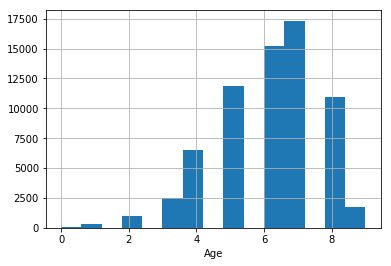

In [44]:
# Finding the distribution for the age of aptient
ax = data_hospital_unique['age'].hist(bins = 15, stacked = True)
ax.set(xlabel='Age')

C:\Users\Shraddha\Documents\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


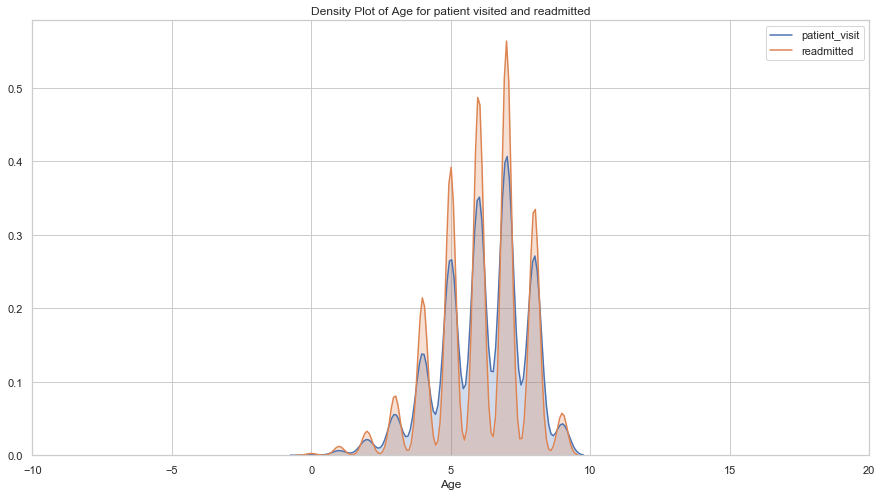

In [45]:
# Creating a density plot for the patient visited vs patient readmitted
from sklearn import preprocessing
plt.rc("font", size=14)
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(15,8))
ax = sb.kdeplot(data_hospital_unique["age"][data_hospital_unique.patient_visit == 1], shade=True)
sb.kdeplot(data_hospital_unique["age"][data_hospital_unique.patient_visit == 0], shade=True)
plt.legend(['patient_visit', 'readmitted'])
plt.title('Density Plot of Age for patient visited and readmitted')
ax.set(xlabel='Age')
plt.xlim(-10,20)
plt.show()

C:\Users\Shraddha\Documents\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


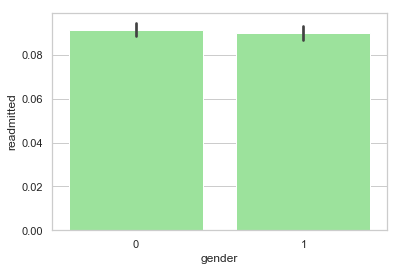

In [46]:
# Bar plot representing the distribution of gender
sb.barplot('gender', 'readmitted', data=data_hospital_unique, color="lightgreen")
plt.show()

In [47]:
data_hospital_unique.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_visit', 'level1_diag1', 'level1_diag2', 'level1_diag3'],
      dtype='object')

C:\Users\Shraddha\Documents\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


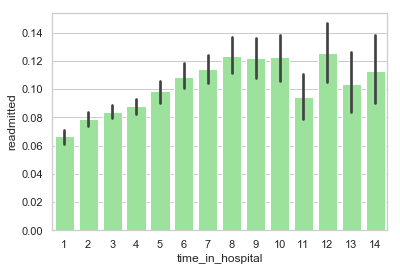

In [48]:
# Bar plot to show days spent by the patient in the hospital 
sb.barplot('time_in_hospital', 'readmitted', data=data_hospital_unique, color="lightgreen")
plt.show()

In [49]:
# sb.barplot(x= data_hospital_unique[['max_glu_serum', 'A1Cresult',
#        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
#        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
#        'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
#        'metformin-pioglitazone', 'diabetesMed']], y=data_hospital_unique['readmitted'], color="lightgreen")
# plt.show()

C:\Users\Shraddha\Documents\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


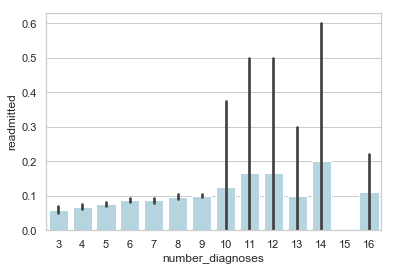

In [50]:
# Bar plot representing the number of diagnoses carried out for a patient and chances of getting readmitted
sb.barplot('number_diagnoses', 'readmitted', data=data_hospital_unique, color="lightblue")
plt.show()

C:\Users\Shraddha\Documents\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


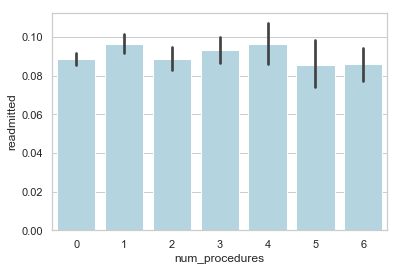

In [51]:
# Number of procedures for a patient that can get readmitted
sb.barplot('num_procedures', 'readmitted', data=data_hospital_unique, color="lightblue")
plt.show()

In [52]:
data_hospital_unique['readmitted']

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        1
12        1
13        0
14        0
15        0
16        1
17        0
18        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
         ..
101710    0
101713    0
101714    0
101716    0
101717    0
101718    0
101720    0
101721    0
101722    0
101723    0
101724    0
101725    0
101726    0
101729    0
101730    0
101731    0
101733    0
101737    0
101740    0
101745    0
101748    0
101749    0
101751    0
101752    0
101753    0
101754    0
101755    0
101756    0
101758    0
101765    0
Name: readmitted, Length: 67580, dtype: int64

### Data Preparation

In [53]:
# # Divinding the dataset into features and label i.e. train_input repreneting all the features and train_output containing the readmitted values
train_input = data_hospital_unique.drop(['readmitted'], axis = 1)
train_output = data_hospital_unique['readmitted']

In [54]:
# Checking Multi-colinearity through VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [55]:
vif = calculate_vif(train_input)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    train_input.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(train_input)

In [56]:
# VIF value demonstrating the possibility of multicollinarity
# where,
#       1 means no multicollinarity
#       1 - 5 means little multicollinarity
#       > 5 highly multicollinarity

vif.sort_values(['VIF'],ascending=0)

,Features,VIF
11,A1Cresult,9.787500
10,num_medications,7.789300
32,diabetesMed,6.885130
8,num_lab_procedures,6.506313
31,change,5.163947
2,race,4.794485
7,time_in_hospital,4.375886
27,insulin,4.209280
6,admission_source_id,4.107736
4,admission_type_id,2.990226


In [57]:
# Removing multicollinarity values which are greater than 3
data_hospital_unique = data_hospital_unique.drop(columns=['A1Cresult','num_medications','diabetesMed','num_lab_procedures',
                                            'race','time_in_hospital', 'admission_source_id'], axis=1)

In [58]:
data_hospital_unique.shape

(67580, 34)

Text(0.5,1,'Distribution of Data')

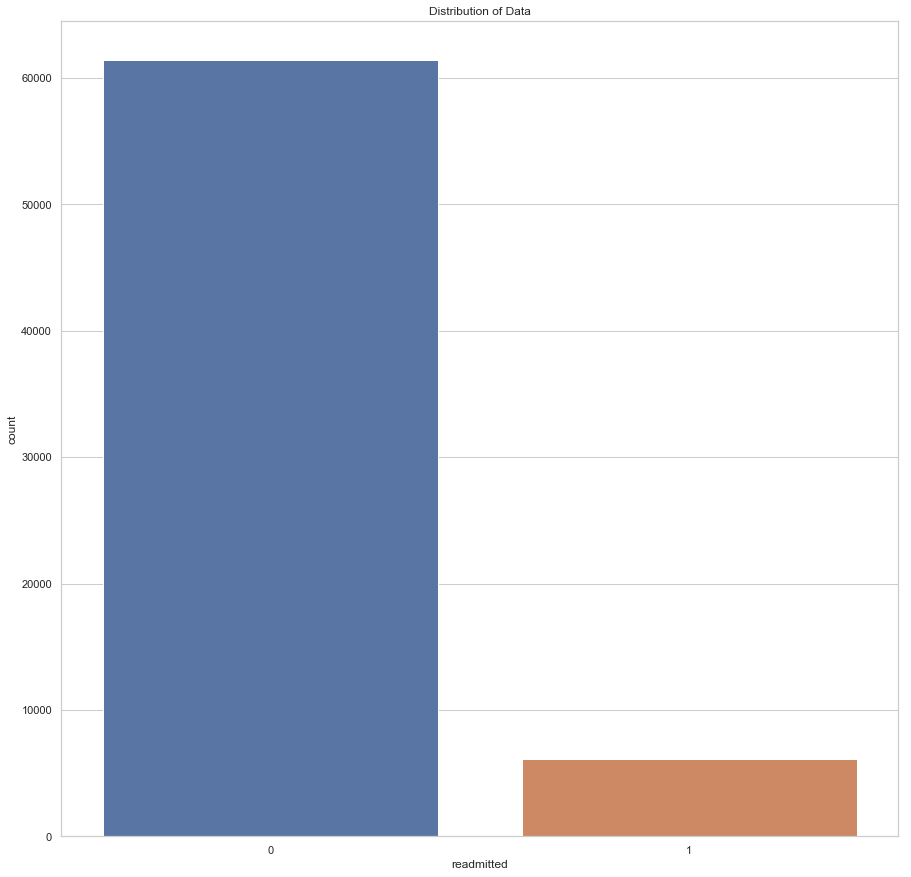

In [59]:
# Plotting the distrution of the readmitted patient
plt.figure(figsize=(15,15))

sb.countplot(x='readmitted',data=data_hospital_unique)

plt.title('Distribution of Data')

The above graph clearly shows that the data is not balanced and it need to be balanced in order to avoid biased outcome

In [60]:
# Divinding the dataset into features and label i.e. train_input repreneting all the features and train_output containing the readmitted values
train_input = data_hospital_unique.drop(['readmitted'], axis = 1)
train_output = data_hospital_unique['readmitted']

In [61]:
# Using SMOTE to balance the readmitted distrution of data

from imblearn.over_sampling import SMOTE
from collections import Counter
import keras

print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Using TensorFlow backend.


Original dataset shape Counter({0: 61451, 1: 6129})
New dataset shape Counter({0: 61451, 1: 61451})


In [62]:
# Creating a dataframe for the balanced output
balanced_train_input = pd.DataFrame(train_input_new)
balanced_train_output = pd.DataFrame(train_output_new)

In [63]:
train_input.shape

(67580, 33)

In [64]:
train_input.columns

Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'num_procedures', 'number_diagnoses',
       'max_glu_serum', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone',
       'change', 'patient_visit', 'level1_diag1', 'level1_diag2',
       'level1_diag3'],
      dtype='object')

In [65]:
balanced_train_output.columns = ["readmitted"]

Text(0.5,1,'Distribution of Data')

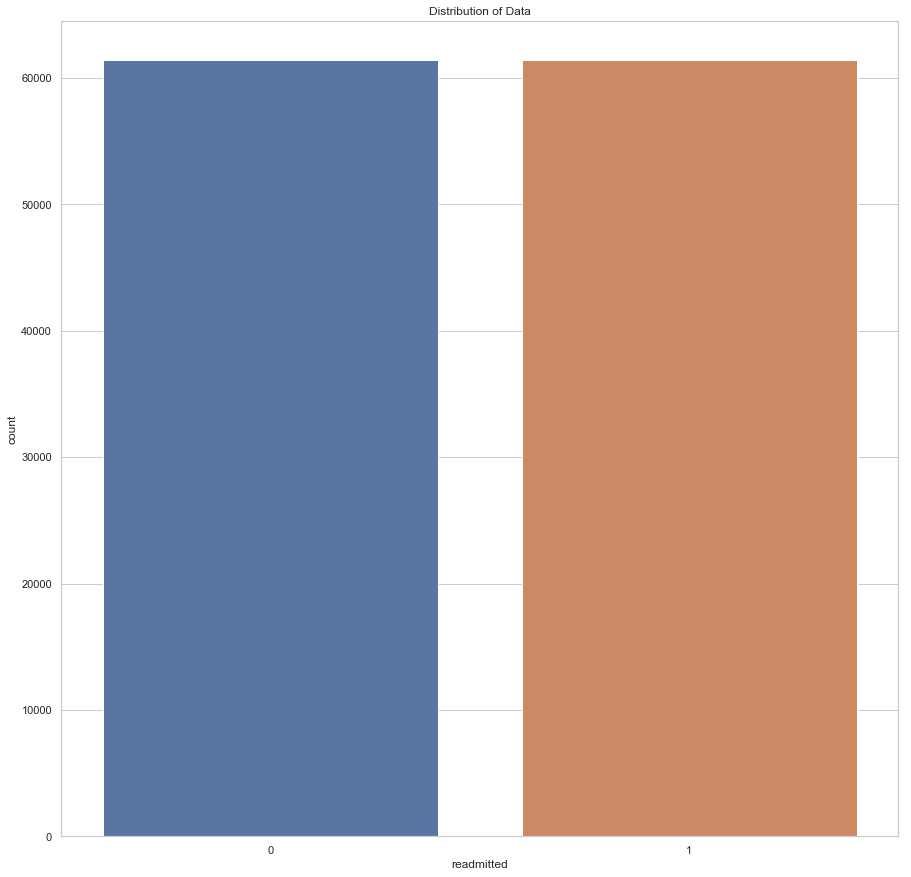

In [66]:
# Plotting the graph for verifying the values of balanced readmitted data
plt.figure(figsize=(15,15))

sb.countplot(x='readmitted',data=balanced_train_output)

plt.title('Distribution of Data')

In [67]:
#Importing Libraries for Evaluation Metrics

#Importing Accuracy Score
from sklearn.metrics import accuracy_score

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Importing Recall Score
from sklearn.metrics import recall_score

#Importing Precision Score
from sklearn.metrics import precision_score

#Importing F1 Score
from sklearn.metrics import f1_score

#Importing cross_val_score
from sklearn.model_selection import cross_val_score


In [68]:
# Splitting the original data into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_train_input, balanced_train_output,test_size=0.2,random_state=0)

### Performing Modeling 

In [69]:
## First Model: Decision Tree

# Running a decision tree for predicting the readmitted patients

# Import decision tree
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree = dtree.fit(X_train, y_train)

#Predicting ourtcome on dataset
y_pred_dtree = dtree.predict(X_test)\

#Finding the Accuracy score
dt_ac = accuracy_score(y_test,y_pred_dtree)
print('The accuracy of the Decision Tree model is:',dt_ac)

print("The F1 score is: ", f1_score(y_test, y_pred_dtree, average="macro"))

print("The Precision score is: ",precision_score(y_test, y_pred_dtree, average="macro"))

print("The Recall score is: ",recall_score(y_test, y_pred_dtree, average="macro")) 

The accuracy of the Decision Tree model is: 0.846629510597616
The F1 score is:  0.8465257964479451
The Precision score is:  0.8475817344139464
The Recall score is:  0.8466348333877766


In [70]:
## Second Model: Logistic Regression

# Performing Logistic Regression for predicting the readmitted patients
from sklearn.linear_model import LogisticRegression

#Build a Logistic regression
LR=LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

#Predict outcome on testing dataset, assign prediction outcome to y_pred
y_pred_LR = LR.predict(X_test) 

# Finding the accuracy score
LR_ac = accuracy_score(y_test,y_pred_LR)
print('The accuracy of the model is:',LR_ac)

print("The F1 score is: ", f1_score(y_test, y_pred_LR, average="macro"))

print("The Precision score is: ",precision_score(y_test, y_pred_LR, average="macro"))

print("The Recall score is: ",recall_score(y_test, y_pred_LR, average="macro")) 

C:\Users\Shraddha\Documents\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shraddha\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the model is: 0.5378951222488915
The F1 score is:  0.5280288938382801
The Precision score is:  0.5413155679008317
The Recall score is:  0.5378657349562929


In [71]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier 

# Build A Random Forest Model
RanFor=RandomForestClassifier()

# Train the model
RanFor.fit(X_train, y_train)

#Predict outcome on testing dataset, assign prediction outcome to y_pred
y_pred_RanFor = RanFor.predict(X_test) 

#accuracy score
rdf_ac=accuracy_score(y_pred_RanFor,y_test)
print('The accuracy of the model is:',rdf_ac)

print("The F1 score is: ", f1_score(y_test, y_pred_RanFor, average="macro"))

print("The Precision score is: ",precision_score(y_test, y_pred_RanFor, average="macro"))

print("The Recall score is: ",recall_score(y_test, y_pred_RanFor, average="macro")) 


C:\Users\Shraddha\Documents\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Shraddha\Documents\New folder\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The accuracy of the model is: 0.8974817948822261
The F1 score is:  0.8973108219144728
The Precision score is:  0.9001250105044544
The Recall score is:  0.8974735321348617


[[11532   761]
 [ 1759 10529]]


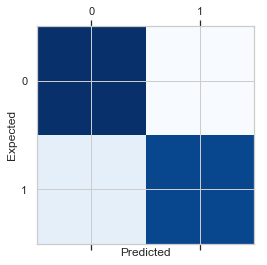

In [72]:
#Confusion Matrix

cm = confusion_matrix(y_test,y_pred_RanFor)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()